# Crimes Against Women Dataset - Exploratory and Descriptive Analysis

In this notebook, we perform an in-depth exploratory and descriptive analysis of the **Crimes Against Women** dataset, which contains reported cases across Indian states and union territories from the years 2001 to 2021. This dataset provides critical insights into the frequency, types, and distribution of crimes committed against women, making it a valuable resource for policy formulation, social awareness, and data-driven intervention planning.

The purpose of this analysis is to uncover patterns, identify high-risk regions, examine the most prevalent types of crimes, and understand long-term trends in gender-based violence. We place particular emphasis on visualizing changes over time, comparing crime volumes across different states, and assessing the impact of specific types of violence such as **domestic abuse**, **assault on modesty**, **rape**, and **trafficking**.

By analyzing the cleaned and reshaped dataset, we aim to build a strong foundation for more advanced statistical or predictive modeling and inform future policy recommendations or public safety initiatives.

---

We begin our analysis by importing essential Python libraries used for **data manipulation**, **visualization**, and **file handling**:

- `pandas`: Used for loading, cleaning, and reshaping structured tabular data, allowing efficient data analysis workflows.

- `numpy`: Supports numerical operations and handling of missing or inconsistent data values.

- `os`: Helps manage file paths and directories during the analysis and export process.

- `plotly.express`: A powerful graphing library used to create interactive and insightful visualizations that reveal key patterns and trends across states, years, and crime categories.



In [209]:
# import libraries
import os 
import pandas as pd 
import numpy as np  
import plotly.express as px 
import plotly.graph_objects as go

## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.





In [211]:
#get working directories
current_dir = os.getcwd() 
#Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir) 
project_root_dir
# Define paths to the data folders
data_dir = os.path.join(project_root_dir, "Data")
raw_dir = os.path.join(data_dir, "raw")
processed_dir = os.path.join(data_dir, "processed")
# Define paths to results folder
results_dir = os.path.join(project_root_dir, "results")
#define paths to the docs folder
docs_dir = os.path.join(project_root_dir,"docs")

# Creates directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)


## Read data in the Data 
We load the cleaned version of the Crimes Against Women dataset from the processed data directory into a Pandas DataFrame. The `head(10)` function is used to display the first ten records, providing a quick view of the key columns such as `state`, `crime_type`, `year` This helps verify that the dataset has been properly cleaned and reshaped into a long format, suitable for analysis and visualization.


In [213]:
crime_data_df= os.path.join(processed_dir, "reshaped_data.csv")
crime_df = pd.read_csv(crime_data_df)
crime_df.head(10)

,State,Year,Crime Type,Value
0,andhra pradesh,2001,No. of Rape cases,871
1,arunachal pradesh,2001,No. of Rape cases,33
2,assam,2001,No. of Rape cases,817
3,bihar,2001,No. of Rape cases,888
4,chhattisgarh,2001,No. of Rape cases,959
5,goa,2001,No. of Rape cases,12
6,gujarat,2001,No. of Rape cases,286
7,haryana,2001,No. of Rape cases,398
8,himachal pradesh,2001,No. of Rape cases,124
9,jammu & kashmir,2001,No. of Rape cases,169


####  Check the Shape of the Dataset and Data Types

Before performing analysis, we check the overall structure of the dataset:

- **Shape**: Tells us how many rows and columns are present in the dataset using `df.shape`.
- **Data Types**: Displays the type of data in each column (e.g., integer, float, object) using `df.dtypes`.
- This step helps us:
  - Confirm that the dataset loaded correctly
  - Understand the structure of the data
  - Identify any columns that may need conversion (e.g., `year` from object to int)

Example:

```crime_python
print(dfcrime_.shape)
print(df.dtypes)


In [215]:
crime_df.shape

(5152, 4)

## Summary Statistics: Numerical Variables

The table below summarizes the key statistics for the numerical columns in the dataset — `Year` and `Value` (i.e., the number of reported crime cases):

| Statistic | Year | Value (Number of Cases) |
|----------:|------|-------------------------|
| Count     | 5,152 | 5,152                  |
| Mean      | 2011.15 | 944.82               |
| Std Dev   | 6.05   | 2,174.42              |
| Min       | 2001   | 0                     |
| 25%       | 2006   | 4                     |
| Median    | 2011   | 79.5                  |
| 75%       | 2016   | 814.25                |
| Max       | 2021   | 23,278                |

### Key Insights:

- The dataset contains **5,152 records**, spanning crime data reported from **2001 to 2021**.
- The **average number of cases** reported is approximately **945**, but with a high **standard deviation** of over **2,174**, which reflects **extreme variation** in crime reporting.
- The **minimum number of cases is 0**, while the **maximum reaches 23,278**, showing that some states and crime types have dramatically high reports compared to others.
- The **median (50th percentile) is only 79.5**, while the **75th percentile is over 814**, indicating a strong **right skew** — most values are small, but a few are extremely large.
- This skewness suggests the presence of **"hotspot states"** or **high-incidence crime types**, likely driving much of the national crime statistics.

These summary statistics help us understand the scale and variability of crimes against women across states and years, setting a foundation for deeper trend and regional analysis.


In [217]:
crime_df.describe()

,Year,Value
count,5152.000000,5152.000000
mean,2011.149457,944.821817
std,6.049927,2174.419490
min,2001.000000,0.000000
25%,2006.000000,4.000000
50%,2011.000000,79.500000
75%,2016.000000,814.250000
max,2021.000000,23278.000000


### Description of Categorical Variables in the Crime Dataset

The dataset contains two categorical columns: **State** and **Crime Type**.

- **State**:  
  - Total records: 5152  
  - Number of unique states: 37  
  - Most frequent state: *Andhra Pradesh* with 147 records

- **Crime Type**:  
  - Total records: 5152  
  - Number of unique crime types: 7  
  - Most common crime type: *No. of Rape cases*, appearing 736 times in the dataset

This summary helps us understand the diversity and distribution of states and crime categories recorded in the dataset.


| Statistic | State            | Crime Type          |
|-----------|------------------|---------------------|
| Count     | 5152             | 5152                |
| Unique    | 37               | 7                   |
| Top       | andhra pradesh   | No. of Rape cases   |
| Freq      | 147              | 736                 |


In [220]:
crime_df.describe(include='object')

,State,Crime Type
count,5152,5152
unique,37,7
top,andhra pradesh,No. of Rape cases
freq,147,736


### Distribution of Crime Types

The following table (or list) shows the count of each type of crime recorded in the dataset under the **Crime Type** column:
This distribution helps identify which crimes against women are most frequently reported in the dataset.



| Crime Type                        | Count |
|----------------------------------|-------|
| No. of Rape cases                | 736   |
| Kidnap And Assault               | 736   |
| Dowry Deaths                     | 736   |
| Assault against women            | 736   |
| Assault against modesty of women| 736   |
| Domestic violence                | 736   |
| Women Trafficking                | 736   |


In [223]:
crime_df['Crime Type'].value_counts()

Crime Type
No. of Rape cases                   736
Kidnap And Assault                  736
Dowry Deaths                        736
Assault against women               736
Assault against modesty of women    736
Domestic violence                   736
Women Trafficking                   736
Name: count, dtype: int64

| Crime Type                        | Proportion |
|----------------------------------|------------|
| No. of Rape cases                | 0.142857   |
| Kidnap And Assault               | 0.142857   |
| Dowry Deaths                     | 0.142857   |
| Assault against women            | 0.142857   |
| Assault against modesty of women| 0.142857   |
| Domestic violence                | 0.142857   |
| Women Trafficking                | 0.142857   |


| State               | Proportion |
|---------------------|------------|
| andhra pradesh      | 0.028533   |
| uttar pradesh       | 0.028533   |
| odisha              | 0.028533   |
| punjab              | 0.028533   |
| rajasthan           | 0.028533   |
| sikkim              | 0.028533   |
| tamil nadu          | 0.028533   |
| tripura             | 0.028533   |
| uttarakhand         | 0.028533   |
| mizoram             | 0.028533   |
| west bengal         | 0.028533   |
| a & n islands       | 0.028533   |
| chandigarh          | 0.028533   |
| daman & diu         | 0.028533   |
| lakshadweep         | 0.028533   |
| puducherry          | 0.028533   |
| arunachal pradesh   | 0.028533   |
| nagaland            | 0.028533   |
| meghalaya           | 0.028533   |
| himachal pradesh    | 0.028533   |
| assam               | 0.028533   |
| bihar               | 0.028533   |
| chhattisgarh        | 0.028533   |
| goa                 | 0.028533   |
| gujarat             | 0.028533   |
| manipur             | 0.028533   |
| haryana             | 0.028533   |
| jammu & kashmir     | 0.028533   |
| jharkhand           | 0.028533   |
| karnataka           | 0.028533   |
| kerala              | 0.028533   |
| madhya pradesh      | 0.028533   |
| maharashtra         | 0.028533   |
| telangana           | 0.014946   |
| d&n haveli          | 0.014946   |
| delhi ut            | 0.014946   |
| d & n haveli        | 0.013587   |


In [226]:
crime_df['Crime Type'].value_counts(normalize=True)

Crime Type
No. of Rape cases                   0.142857
Kidnap And Assault                  0.142857
Dowry Deaths                        0.142857
Assault against women               0.142857
Assault against modesty of women    0.142857
Domestic violence                   0.142857
Women Trafficking                   0.142857
Name: proportion, dtype: float64

In [227]:
crime_df['State'].value_counts(normalize=True)

State
andhra pradesh       0.028533
uttar pradesh        0.028533
odisha               0.028533
punjab               0.028533
rajasthan            0.028533
sikkim               0.028533
tamil nadu           0.028533
tripura              0.028533
uttarakhand          0.028533
mizoram              0.028533
west bengal          0.028533
a & n islands        0.028533
chandigarh           0.028533
daman & diu          0.028533
lakshadweep          0.028533
puducherry           0.028533
arunachal pradesh    0.028533
nagaland             0.028533
meghalaya            0.028533
himachal pradesh     0.028533
assam                0.028533
bihar                0.028533
chhattisgarh         0.028533
goa                  0.028533
gujarat              0.028533
manipur              0.028533
haryana              0.028533
jammu & kashmir      0.028533
jharkhand            0.028533
karnataka            0.028533
kerala               0.028533
madhya pradesh       0.028533
maharashtra          0.028533
tela

In [228]:
year = 2020 
crime_2020 = crime_df[crime_df['Year'] == year].groupby('Crime Type')['Value'].sum().reset_index()



Presenting the data visually like this aids in identifying key areas to focus on when addressing these crimes.


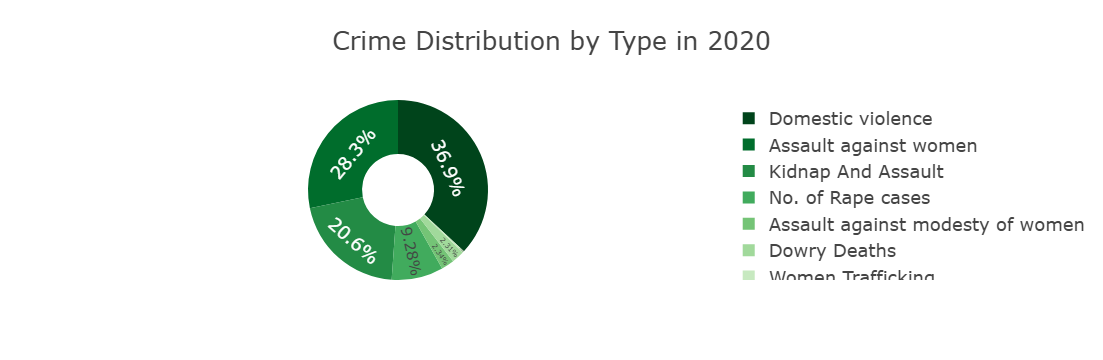

In [230]:
fig = px.pie(
    crime_2020,
    names='Crime Type',
    values='Value',
    title=f'Crime Distribution by Type in {year}',
    hole=0.4,
    template='presentation',
    color_discrete_sequence=px.colors.sequential.Greens_r
)

fig.update_traces(
    textinfo='percent',      
    textposition='inside',    
    hoverinfo='label+percent' 
)

fig.update_layout(
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.write_image(os.path.join(results_dir, 'pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'pie_chart.html'))
fig.show()


This pie chart shows the proportion of different types of crimes against women recorded in the dataset.

- Each slice of the pie represents the count of a specific crime type.
- The largest slice corresponds to *Domestic vilonce*, which appears more frequently than other crimes.
- The smallest slice corresponds to *women trafficking*
- This visualization helps us better understand which crimes against women are most prevalent in the dataset.


In [232]:
top_5_states = crime_df.groupby('State')['Value'].sum().nlargest(5).reset_index()
crime_by_state = crime_df[crime_df['State'].isin(top_5_states['State'])]
crime_by_state = crime_by_state.groupby(['State', 'Crime Type'])['Value'].sum().reset_index()
state_order = top_5_states['State'].tolist()
crime_by_state['State'] = pd.Categorical(crime_by_state['State'], categories=state_order, ordered=True)
crime_by_state = crime_by_state.sort_values('State')

### Crime distribution in Top 5 states 
   - Displays the **total crime counts per state** while breaking down those totals by **different crime types** stacked together.  
   - Allows comparison of both the **overall volume of crimes** and the **composition of crime types** across multiple states simultaneously.  
   - Useful for understanding how much crime occurs in each state and which crime types contribute to those totals.

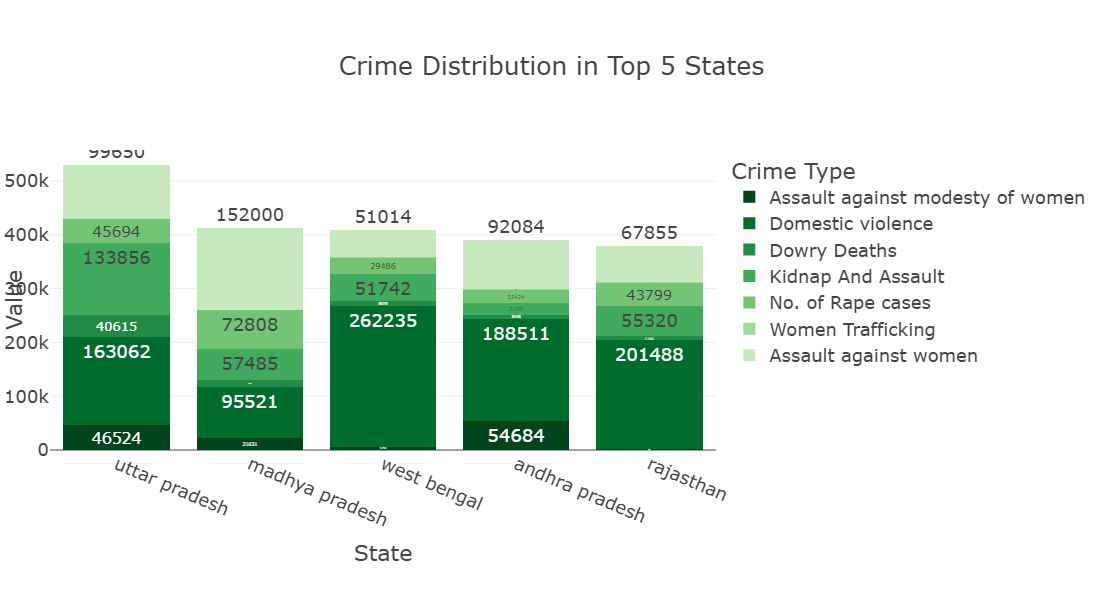

In [277]:
fig = px.bar(
    crime_by_state,
    x='State',
    y='Value',
    color='Crime Type',
    title='Crime Distribution in Top 5 States',
    barmode='stack',
    text='Value',
    height=600,
    width=1000,
    template='presentation', 
    color_discrete_sequence=px.colors.sequential.Greens_r
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=23,
    margin=dict(l=50, r=50, t=150, b=150)
)
fig.write_image(os.path.join(results_dir, 'Top5_most_reported_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'Top5_most_reported_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'Top5_most_reported_bar_plot.html'))
fig.show()


 bar chart illustrates the total number of reported crimes against women across the top 5 states, broken down by different crime types.

- **Uttar Pradesh** has the highest total crime count among these states, indicating a significant number of incidents.
- **Rajasthan** reports the lowest total crime count within this group.
- Each state's total crime figures combine several types of crimes, such as rape cases, kidnapping, and others.
- This visualization helps highlight both the volume of crimes per state and the relative prevalence of specific crime types within those states, guiding focused interventions.

### Crime trends over years

In [237]:
crime_over_years = crime_df.groupby(['Year', 'Crime Type'])['Value'].sum().reset_index().sort_values(['Year', 'Crime Type'])

### Crime Trends Over the Years

The line chart titled **"Crime Trends Over Years"** illustrates how different types of crimes against women have changed over time.

- The **x-axis** represents the years covered in the dataset.
- The **y-axis** shows the number of reported cases (`Value`) for each crime type.
- Each line represents a **specific type of crime**, such as rape, kidnapping, dowry deaths, etc.
- **Markers** are used to highlight data points for each year, making it easier to trace changes in trend lines.



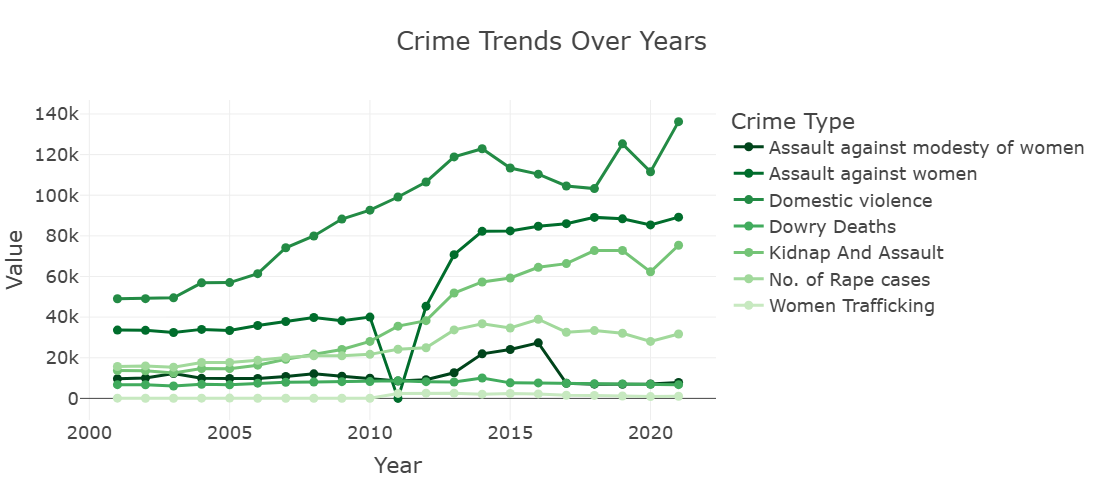

In [239]:
fig2 = px.line(
    crime_over_years,
    x='Year',
    y='Value',
    color='Crime Type',
    markers=True,
    title='Crime Trends Over Years',
    width=900,
    height=500,                                 
    template='presentation',                    
    color_discrete_sequence=px.colors.sequential.Greens_r
)

fig2.update_traces(mode='lines+markers')
fig2.update_layout(
    xaxis_tickangle=0,
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig2.write_image(os.path.join(results_dir, 'crime_trends_over_years.jpg'))
fig2.write_image(os.path.join(results_dir, 'crime_trends_over_years.png'))
fig2.write_html(os.path.join(results_dir, 'crime_trends_over_years.html'))

fig2.show()


- The chart helps identify whether certain crimes have **increased, decreased, or remained stable** over the years.
- By comparing trends across crime types, we can see which issues have become more or less prominent over time.

  This visualization is useful for policymakers, researchers, and social organizations to understand the **evolution of gender-based violence** and   guide **targeted interventions** based on historical data.


#### Trend of Top 3 Crime Types Over the Years


In [242]:
top_3_crimes = crime_df.groupby('Crime Type')['Value'].sum().nlargest(3).index.tolist()
crime_trend_top3 = crime_df[crime_df['Crime Type'].isin(top_3_crimes)]
crime_trend_by_year = crime_trend_top3.groupby(['Year', 'Crime Type'])['Value'].sum().reset_index()

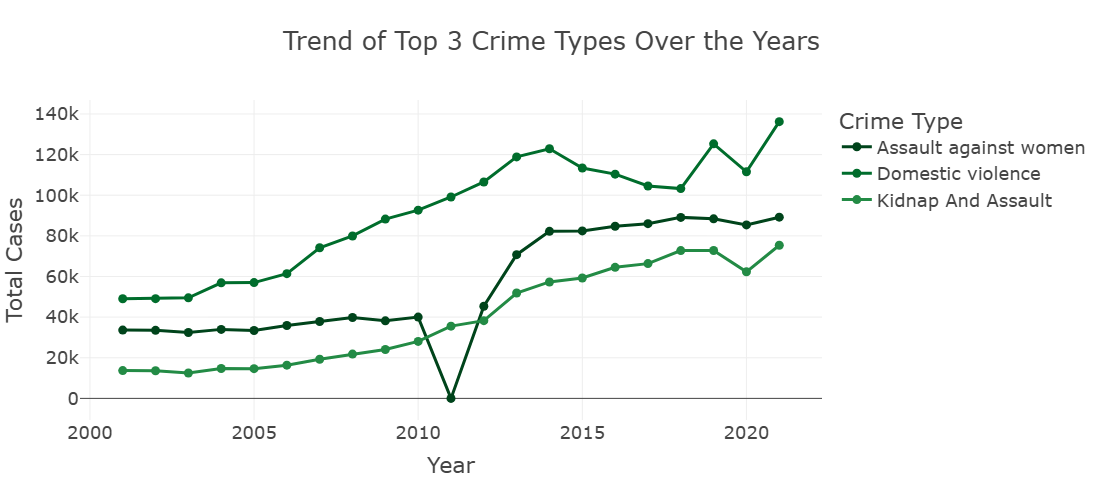

In [243]:
fig = px.line(
    crime_trend_by_year,
    x='Year',
    y='Value',
    color='Crime Type',
    markers=True,
    title='Trend of Top 3 Crime Types Over the Years',
    labels={'Value': 'Total Cases'},
    height=500,
    width=900,                 
    template='presentation',
    color_discrete_sequence=px.colors.sequential.Greens_r
)
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_tickangle=0,
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    legend_title_text='Crime Type'
)

fig.write_image(os.path.join(results_dir, 'top3_crime_trends_over_years.jpg'))
fig.write_image(os.path.join(results_dir, 'top3_crime_trends_over_years.png'))
fig.write_html(os.path.join(results_dir, 'top3_crime_trends_over_years.html'))

fig.show()


- The chart helps to **visually compare trends** of the top 3 crimes over the year.
- It shows whether cases are **rising, falling, or stable**, offering insights into crime dynamics.
- This focused view supports **evidence-based decision making** and awareness on the most prevalent forms of violence against women.


### Top 10 most frequently reported crimes

In [246]:
top_crimes = crime_df.groupby('Crime Type')['Value'].sum().nlargest(10).reset_index()

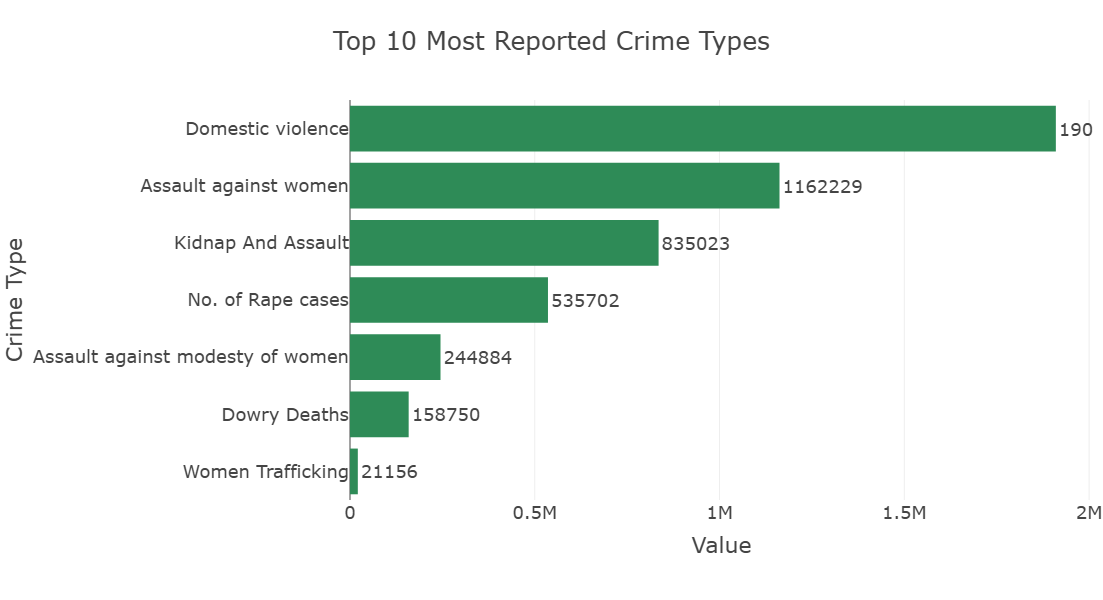

In [247]:
fig = px.bar(
    top_crimes,
    x='Value',
    y='Crime Type',
    orientation='h',  
    title='Top 10 Most Reported Crime Types',
    text='Value',
    color_discrete_sequence=['seagreen'],  
    height=600,
    width=1000,
    template='presentation'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    margin=dict(l=350, r=10, t=100, b=100)  
)

fig.write_image(os.path.join(results_dir, 'Top10_most_reported_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'Top10_most_reported_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'Top10_most_reported_bar_plot.html'))

fig.show()


This horizontal bar chart visualizes the **top 10 most frequently reported crimes** based on the number of recorded cases.

- The **y-axis** lists the crime types, ordered by total cases in ascending order.
- The **x-axis** represents the number of reported cases (`Value`).
- Each bar is labeled with the exact count and is color-coded by magnitude for better visual emphasis.


- This chart clearly highlights which types of crimes are **most prevalent** in the dataset. and the most is Domestic Viloence
- It helps to quickly identify **priority areas** for policy intervention, awareness, and law enforcement efforts.
- The use of a horizontal layout improves readability, especially for longer crime type names.

This visualization is useful for summarizing the most critical forms of violence against women and supporting targeted actions 

In [256]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, spearmanr

contingency = pd.pivot_table(crime_df, values='Value', index='State', columns='Crime Type', aggfunc='sum', fill_value=0)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square test between State and Crime Type:")
print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.5f}")

if p < 0.05:
    print("=> Significant association between State and Crime Type (reject null hypothesis).")
else:
    print("=> No significant association between State and Crime Type (fail to reject null hypothesis).")

# 2. Correlation analysis between Year and crime Value by Crime Type

print("\nSpearman correlation between Year and crime Value for each Crime Type:")

correlation_results = []

for crime in crime_df['Crime Type'].unique():
    subset = crime_df[crime_df['Crime Type'] == crime]
    corr, pval = spearmanr(subset['Year'], subset['Value'])
    correlation_results.append({'Crime Type': crime, 'Spearman Correlation': corr, 'p-value': pval})

corr_df = pd.DataFrame(correlation_results)
print(corr_df)

# Interpret correlations
print("\nRecommendations based on statistical tests:")

if p < 0.05:
    print("- Crime distribution varies significantly by State. Target interventions at high-crime states.")
else:
    print("- Crime distribution does not vary significantly by State, suggesting uniform patterns.")

for _, row in corr_df.iterrows():
    if row['p-value'] < 0.05:
        trend = "increasing" if row['Spearman Correlation'] > 0 else "decreasing"
        print(f"- '{row['Crime Type']}' shows a statistically significant {trend} trend over years (correlation = {row['Spearman Correlation']:.2f}).")
    else:
        print(f"- '{row['Crime Type']}' shows no significant trend over years.")

print("\nAdditional notes:")
print("- Consider socio-economic factors for deeper correlations.")
print("- Use regression or time series analysis for forecasting trends.")


Chi-square test between State and Crime Type:
Chi2 statistic = 1039977.76, p-value = 0.00000
=> Significant association between State and Crime Type (reject null hypothesis).

Spearman correlation between Year and crime Value for each Crime Type:
                         Crime Type  Spearman Correlation       p-value
0                 No. of Rape cases              0.129544  4.261818e-04
1                Kidnap And Assault              0.200640  4.021422e-08
2                      Dowry Deaths             -0.017134  6.426011e-01
3             Assault against women              0.151784  3.553061e-05
4  Assault against modesty of women              0.080348  2.928747e-02
5                 Domestic violence              0.108515  3.201934e-03
6                 Women Trafficking              0.449122  8.076209e-38

Recommendations based on statistical tests:
- Crime distribution varies significantly by State. Target interventions at high-crime states.
- 'No. of Rape cases' shows a statist